# IE 48B Time Series Analysis Project Report

### Group 5

- Ahmet Tabakoğlu
- Yusuf Sina Öztürk


## 1) Introduction

### Problem Description

In this task, we are interested in the sign of the difference between the total volume of the down and up instructions in the Turkish Electricity Market. Basicaly, we are going to predict half of the next day signs with using the latest data which is 5 hour before the submition time. 

Before and during the submition period, we continue to develop our model. The summary of our latest and proposed approach is that we start with the linear regression model and find the best linear regression model with using only the raw data which is given and then we improve our model with using regression tree based approach (EBLR) for some iteration. Also we are using the `system direction` variable in our regression model but we need to predict that variable also. Therefore, we followed classification approach using different kind of representations and distance measurement with KNN classifier for each representation and distance measure. After finding the `system direction` sign for that specific hour we used that in our regression model and make the prediction for each hour seperately.

#### Description of the used data

Our target variable is the `net` variable which is difference between `upRegulationDelivered` and `downRegulationDelivered`.

Those delivered data are is some kind of summation of Zero, One and TwoCoded data. Therefore, Delivered, ZeroCoded, OneCoded, and TwoCoded data are correlated with our target variable which means we do not use those in our regression model. 

Another data set that we are used while we are build our regression is weather information. We have 6 different weather condition listed above for 7 different location:

- DSWRF_surface: downward shortwave radiation at the surface
- RH_2.m.above.ground: relative humidity at 2m above ground
- TMP_2.m.above.ground: temperature at 2m above ground
- TCDC_low.cloud.layer: total cloud cover at the low cloud layer
- ws_10m: wind speed at 10 meters height
- wdir_10m : wind direction in degrees at 10 meters height

Those weather data are useful in our regression model because weather conditions affect both electricty consumption and generation. 

Also, we added our data set trend , name of the day and month columns to represent seasonality and trend.

One last data that we used in our bulk data set is System Marginal Price (SMP) and Market Clearing Prices (MCP) data which are the prices in the market.





## 2) Related Literature

Electricity markets garner attention with their unique property of balancing requirements in both short and long term. Energy grids consist of heterogeneous interconnected systems, of an increasing number of small-scale and of dispersed energy generation and consumption devices. In these grids, electricity consumption and production should be at par at all times to prevent infrastructure damage. Therefore, over or under forecasting compared to actual consumption and production is severely penalized by the balancing market.

Ideally, if a distributor/supplier knows about their customer base’s demand consistently with high accuracy, they might position themselves on the over the counter (OTC) (i.e. bilateral) markets via long term contracts and day-ahead market orders for fine tuning. Properly forecasting of the electricity load is the main pain point for all market participants. Increasing share of renewable energy sources (i.e. wind, solar, hydropower, geothermal) that are harder to forecast is major problem in terms of the foreseeability. Therefore, trading in the Day-Ahead Market is necessary. 

Players determine their ask/bid amount based on their forecasts and determine the price to ask/bid based on their costs in general. Forecasts are mainly driven by the weather conditions or special events such as national or religious holidays.

The main reason of the interest in the sign of the system imbalance is due to the relation between the price and the demand/supply. If the system imbalance is positive, intra-day price (namely WAP) is generally smaller since supply is larger than required amount. It is generally the opposite for the negative imbalance case. Correct classification of the system imbalance for a particular hour helps decision makers to make their pricing decisions in an effective way.

System_direction information is the target and target assignment is performed based on the net value as:
- if net>=50 then system_direction='Positive'
- if net<=-50 then system_direction='Negative'
- otherwise system_direction='Neutral'




## 3) Approach

As we mentioned before in the introduction approach, we start with finding the best linear regression model to fit our task.

### Finding the Linear Regression Model

Starting with using only trend and seasonal terms:

In [ ]:
lm_1 <- lm(net~ trnd + w_day + mon + as.factor(hour), data = bulk_imbalance) 

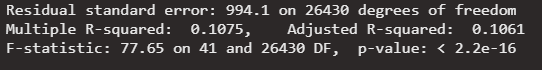

Adding MCP and SMP data to see the improvements.

In [ ]:
lm_2 <- lm(net~ trnd +w_day +mon +as.factor(hour) +MCP +SMP, data = bulk_imbalance)

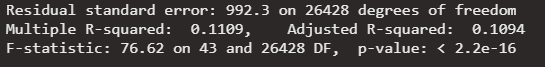

Now, we added all 6 different weather variables with for 7 different location.

In [ ]:
lm_3 <- lm(net~. -datetime -date -hour +as.factor(hour) 
           -upRegulationZeroCoded -upRegulationOneCoded -upRegulationTwoCoded 
           -downRegulationZeroCoded -downRegulationOneCoded -downRegulationTwoCoded 
           -upRegulationDelivered -downRegulationDelivered 
           -system_direction
           , data = train)

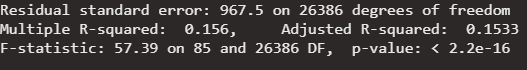

Because, we are going to follow classificiaton approach to find `system_direction`, finally we added `system_direction` into our regression model

In [ ]:
lm_4 <- lm(net~. -datetime -date -hour +as.factor(hour) 
           -upRegulationZeroCoded -upRegulationOneCoded -upRegulationTwoCoded 
           -downRegulationZeroCoded -downRegulationOneCoded -downRegulationTwoCoded 
           -upRegulationDelivered -downRegulationDelivered
           , data = train)

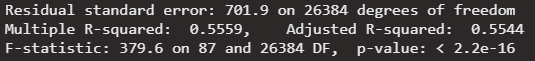



So finally, we achived 

R-Squared = 0.5544

### EBLR Approach

Now time to improve the model with using Regression Tree Based Approach (EBLR)

Our first tree is this:

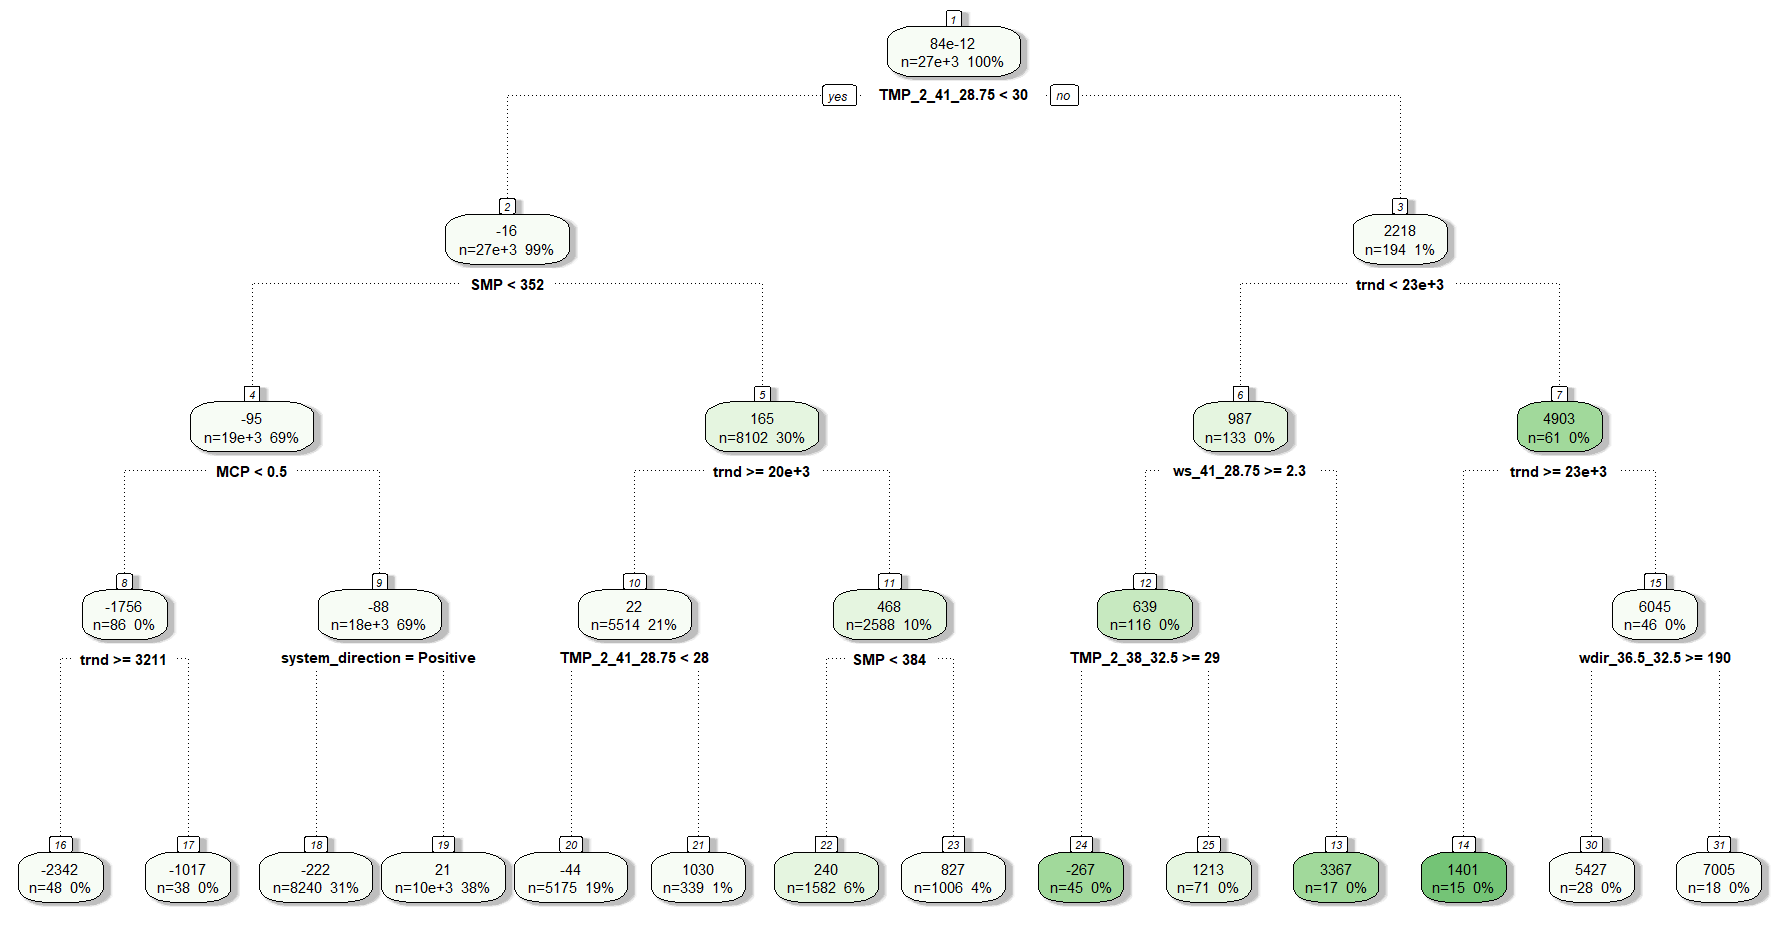

We select the cell with the most shares. 

Implementing that cell into the model and built the regression model again:

In [ ]:
lm_4_iter_1 = lm(net~. -actual - predicted -residual 
                 -datetime -date -hour +as.factor(hour) 
                 -upRegulationZeroCoded -upRegulationOneCoded -upRegulationTwoCoded 
                 -downRegulationZeroCoded -downRegulationOneCoded -downRegulationTwoCoded 
                 -upRegulationDelivered -downRegulationDelivered
                 -TMP_2_41_depth_1 -SMP_depth_2 -MCP_depth_3 -system_direction_depth_4
                 +TMP_2_41_depth_1:SMP_depth_2:MCP_depth_3:system_direction_depth_4
                 , data = tmp)

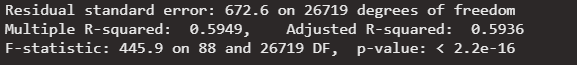

We improved the R-square with 3%. We can go one more iteration.

Second tree is:

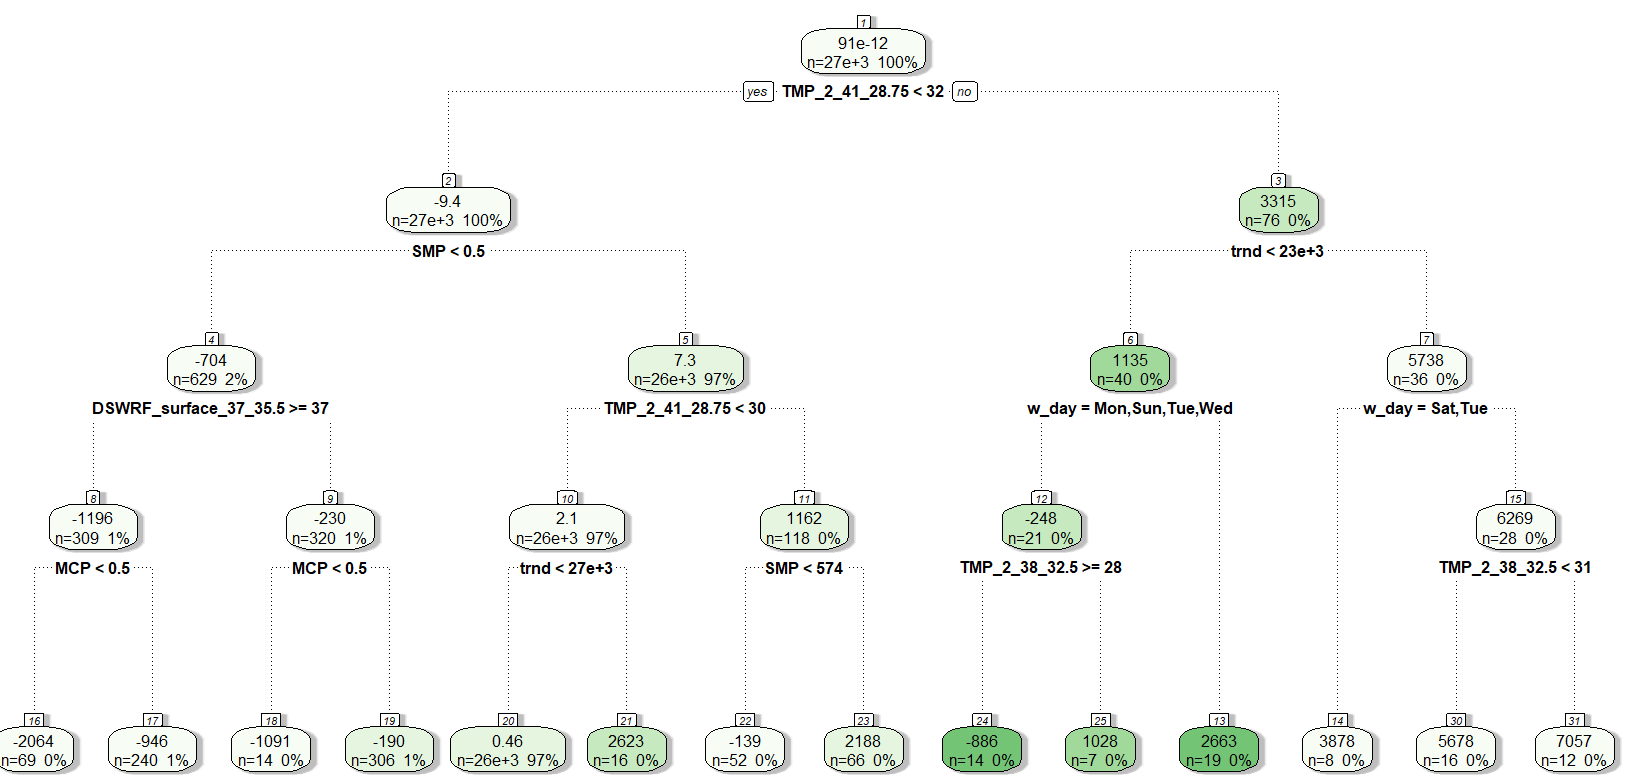

With the biggest percentage cell divided by trnd so it is useless. Therefore, we are going to consider the biggest value of a cell which is in the far right.

Implementing that cell and built another model:

In [ ]:
lm_4_iter_2 = lm(net~. -actual - predicted -residual 
                 -datetime -date -hour +as.factor(hour) 
                 -upRegulationZeroCoded -upRegulationOneCoded -upRegulationTwoCoded 
                 -downRegulationZeroCoded -downRegulationOneCoded -downRegulationTwoCoded 
                 -upRegulationDelivered -downRegulationDelivered
                 -TMP_2_41_depth_1 -SMP_depth_2 -MCP_depth_3 -system_direction_depth_4
                 -TMP_2_41_depth_1_iter2 -trnd_depth_2_iter2 -w_day_depth_3_iter2 -TMP_2_38_depth_4_iter2
                 +TMP_2_41_depth_1:SMP_depth_2:MCP_depth_3:system_direction_depth_4
                 +TMP_2_41_depth_1_iter2:trnd_depth_2_iter2:w_day_depth_3_iter2:TMP_2_38_depth_4_iter2
                 , data = tmp)

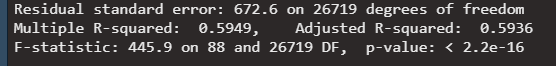

We could not make any improvement in the model so we stoped here to follow EBLR approach.

### Classification

In order to work properly, we melted the data to long format but the codes are not included here.

#### Representations

#### Piecewise Aggregate Approximation

In [ ]:
#Parameter Set 1

selected_series=1
segment_length=5
paa_rep = vector("numeric",)
control = 0
paa_rep_all = vector("numeric",)
loop_indise = n_series_train * ceiling(tlength/5)

In [ ]:
for( i in 1:n_series_train){
  
  selected_series = i
  temp_data_ts = long_train[id == selected_series]$value
  temp_paa_rep=repr_paa(temp_data_ts, segment_length, meanC)
  paa_rep = append(paa_rep, temp_paa_rep)
}

In [ ]:
for( i in 1:loop_indise){
    if(control != 19){
      temp = rep(paa_rep[i], times = 5)
      paa_rep_all = append(paa_rep_all,temp)
      control = control + 1
    }
    else{
      paa_rep_all = append(paa_rep_all,paa_rep[i])
      control = 0
    }  
}

long_train[,paa_rep := paa_rep_all]

In [ ]:
#Parameter Set 2

segment_length=10
paa_rep_2 = vector("numeric",)
control = 0
paa_rep_all_2 = vector("numeric",)
loop_indise = n_series_train * ceiling(tlength/10)

In [ ]:
for( i in 1:n_series_train){
  
  selected_series = i
  temp_data_ts = long_train[id == selected_series]$value
  temp_paa_rep=repr_paa(temp_data_ts, segment_length, meanC)
  paa_rep_2 = append(paa_rep_2, temp_paa_rep)
  
}

In [ ]:
for( i in 1:loop_indise){
    if(control != 9){
      temp = rep(paa_rep_2[i], times = 10)
      paa_rep_all_2 = append(paa_rep_all_2,temp)
      control = control + 1
    }
    else{
      temp = rep(paa_rep_2[i], times = 6)
      paa_rep_all_2 = append(paa_rep_all_2,temp)
      control = 0
    }
}

long_train[,paa_rep_2 := paa_rep_all_2]

#### Symbolic Aggregate Approximation (SAX)

In [ ]:
#Parameter Set 1

sax_segment_length=4
sax_alphabet_size=5
sax_rep = vector("character",)
sax_rep_all = vector("character",)
loop_indise = n_series_train * ceiling(tlength/4)

In [ ]:
for( i in 1:n_series_train){
  
  selected_series = i
  temp_data_ts = long_train[id == selected_series]$value
  temp_sax_rep=repr_sax(temp_data_ts, q = sax_segment_length, a = sax_alphabet_size)
  sax_rep = append(sax_rep, temp_sax_rep)
  
}

In [ ]:
for( i in 1:loop_indise){
    temp = rep(sax_rep[i], times = 4)
    sax_rep_all = append(sax_rep_all,temp)
}

long_train[,sax_rep_char := sax_rep_all]
long_train[,sax_rep_char_num := as.numeric(as.factor(sax_rep_all))]  
long_train[,sax_rep:=mean(value),by = list(id,sax_rep_char_num)]
long_train$sax_rep = as.numeric(long_train$sax_rep)

In [ ]:
#Parameter Set 2

sax_segment_length=8
sax_alphabet_size=4
sax_rep_2 = vector("character",)
sax_rep_all_2 = vector("character",)
loop_indise = n_series_train * ceiling(tlength/8)

In [ ]:
for( i in 1:n_series_train){
  
  selected_series = i
  temp_data_ts = long_train[id == selected_series]$value
  temp_sax_rep=repr_sax(temp_data_ts, q = sax_segment_length, a = sax_alphabet_size)
  sax_rep_2 = append(sax_rep_2, temp_sax_rep)
  
}

In [ ]:
for( i in 1:loop_indise){
    temp = rep(sax_rep_2[i], times = 8)
    sax_rep_all_2 = append(sax_rep_all_2,temp)
  }  
}

long_train[,sax_rep_char_2 := sax_rep_all_2]
long_train[,sax_rep_char_num_2 := as.numeric(as.factor(sax_rep_all_2))]  
long_train[,sax_rep_2:=mean(value),by = list(id,sax_rep_char_num_2)]

long_train = long_train[,-c("sax_rep_char","sax_rep_char_num","sax_rep_char_2",
                            "sax_rep_char_num_2")]


#### Distance Calculations

#### Euclidian Distance

Because the compitations of the distances are take time, we store distance matrices in the repository.

In [ ]:
#Euclidean Distance
raw_dist_euc <- as.matrix(dist(wide_raw_rep_with_test))
paa_dist_euc <- as.matrix(dist(wide_paa_rep_with_test))
paa2_dist_euc <- as.matrix(dist(wide_paa_rep_2_with_test))
sax_dist_euc <- as.matrix(dist(wide_sax_rep_with_test))
sax2_dist_euc <- as.matrix(dist(wide_sax_rep_2_with_test))

large_number = 100000000
diag(raw_dist_euc) = large_number
diag(paa_dist_euc) = large_number
diag(paa2_dist_euc) = large_number
diag(sax_dist_euc) = large_number
diag(sax2_dist_euc) = large_number


#### Dynamic Time Warping (DTW)

In [ ]:
#DTW Distance
raw_dist_dtw=as.matrix(dtwDist(wide_raw_rep_with_test))
paa_dist_dtw=as.matrix(dtwDist(wide_paa_rep_with_test))
paa2_dist_dtw=as.matrix(dtwDist(wide_paa_rep_2_with_test))
sax_dist_dtw=as.matrix(dtwDist(wide_sax_rep_with_test))
sax2_dist_dtw=as.matrix(dtwDist(wide_sax_rep_2_with_test))

diag(raw_dist_dtw)=large_number
diag(paa_dist_dtw) = large_number
diag(paa2_dist_dtw) = large_number
diag(sax_dist_dtw) = large_number
diag(sax2_dist_dtw) = large_number


#### LCSS

In [ ]:
#LCSS Distance

raw_dist_lcss=TSDatabaseDistances(wide_raw_rep_with_test,distance='lcss',epsilon=0.05)
raw_dist_lcss=as.matrix(raw_dist_lcss)
diag(raw_dist_lcss)=large_number

paa_dist_lcss=TSDatabaseDistances(wide_paa_rep_with_test,distance='lcss',epsilon=0.05)
paa_dist_lcss=as.matrix(paa_dist_lcss)
diag(paa_dist_lcss)=large_number

paa2_dist_lcss=TSDatabaseDistances(wide_paa_rep_2_with_test,distance='lcss',epsilon=0.05)
paa2_dist_lcss=as.matrix(paa2_dist_lcss)
diag(paa2_dist_lcss)=large_number

sax_dist_lcss=TSDatabaseDistances(wide_sax_rep_with_test,distance='lcss',epsilon=0.05)
sax_dist_lcss=as.matrix(sax_dist_lcss)
diag(sax_dist_lcss)=large_number

sax2_dist_lcss=TSDatabaseDistances(wide_sax_rep_2_with_test,distance='lcss',epsilon=0.05)
sax2_dist_lcss=as.matrix(sax2_dist_lcss)
diag(sax2_dist_lcss)=large_number

#### ERP Distance

In [ ]:
#ERP Distance

raw_dist_erp=TSDatabaseDistances(wide_raw_rep_with_test,distance='erp',g=0.5)
raw_dist_erp=as.matrix(raw_dist_erp)
diag(raw_dist_erp)=large_number

paa_dist_erp=TSDatabaseDistances(wide_paa_rep_with_test,distance='erp',g=0.5)
paa_dist_erp=as.matrix(paa_dist_erp)
diag(paa_dist_erp)=large_number

paa2_dist_erp=TSDatabaseDistances(wide_paa_rep_2_with_test,distance='erp',g=0.5)
paa2_dist_erp=as.matrix(paa2_dist_erp)
diag(paa2_dist_erp)=large_number

sax_dist_erp=TSDatabaseDistances(wide_sax_rep_with_test,distance='erp',g=0.5)
sax_dist_erp=as.matrix(sax_dist_erp)
diag(sax_dist_erp)=large_number

sax2_dist_erp=TSDatabaseDistances(wide_sax_rep_2_with_test,distance='erp',g=0.5)
sax2_dist_erp=as.matrix(sax2_dist_erp)
diag(sax2_dist_erp)=large_number

#### Classifications (KNN Classifier)

We are going to use Neighbourhood Search with Cross Validation approach as we did in previous homeworks and the course.  

In [ ]:
nn_classify_cv=function(dist_matrix,train_class,test_indices,k=1){
  
  test_distances_to_train=dist_matrix[test_indices,]
  test_distances_to_train=test_distances_to_train[,-test_indices]
  train_class=train_class[-test_indices]
  #print(str(test_distances_to_train))
  ordered_indices=apply(test_distances_to_train,1,order)
  if(k==1){
    nearest_class=as.numeric(allclass[as.numeric(ordered_indices[1,])])
    nearest_class=data.table(id=test_indices,nearest_class)
  } else {
    nearest_class=apply(ordered_indices[1:k,],2,function(x) {allclass[x]})
    nearest_class=data.table(id=test_indices,t(nearest_class))
  }
  
  long_nn_class=melt(nearest_class,'id')
  
  class_counts=long_nn_class[,.N,list(id,value)]
  class_counts[,predicted_prob:=N/k]
  wide_class_prob_predictions=dcast(class_counts,id~value,value.var='predicted_prob')
  wide_class_prob_predictions[is.na(wide_class_prob_predictions)]=0
  class_predictions=class_counts[,list(predicted=value[which.max(N)]),by=list(id)]
  
  
  return(list(prediction=class_predictions,prob_estimates=wide_class_prob_predictions))
  
}

##### Cross Validation

In [ ]:
set.seed(100)
nof_rep=5
n_fold=10
k_levels=c(1,3,5)
iter=1

In [ ]:
cv_indices=generateCVRuns(trainclass, ntimes =nof_rep, nfold = n_fold, 
                          leaveOneOut = FALSE, stratified = TRUE)

After getting the cv indices, we can do cross validation with below loop:

In [ ]:
for(m in 1:length(dist_files)){ #
  print(dist_files[m])
  dist_mat=as.matrix(fread(dist_files[m],header=FALSE))
  for(i in 1:nof_rep){
    this_fold=cv_indices[[i]]
    for(j in 1:n_fold){
      test_indices=this_fold[[j]]
      for(k in 1:length(k_levels)){
        current_k=k_levels[k]
        current_fold=nn_classify_cv(dist_mat,allclass,test_indices,k=current_k)
        accuracy=sum(allclass[test_indices]==current_fold$prediction$predicted)/length(test_indices)
        tmp=data.table(approach=approach_file[m],repid=i,foldid=j,
                       k=current_k,acc=accuracy)
        result[[iter]]=tmp
        iter=iter+1
      }
    }
  }   
}

This gaves us, the best model with respect to its accuracy for `system direction` for each hour. 

And with the best model, we are going to predict the `system direction` sign.

### Final Prediction

So now, we are good to do prediction with our latest `lm_4_iter_2` model.

Note that, for MCP and SMP data, we take their lagged values.

For weather data, we already have for the future, thanks to meteorology people. 

For, `system_direction` we follow the above approaches for each hour.

Finally, the regression model predict`net` variable and with respect to its sign we submit the sign of it every dat in submition phase of the project.

## 4) Results

Here is our daily results of the predictions:

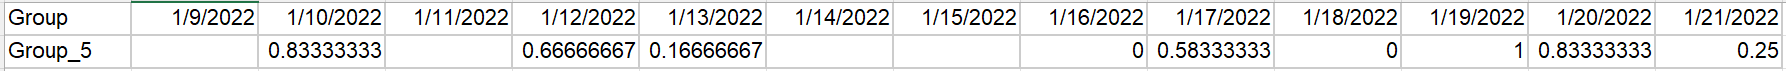

Because of the some days are conflicted by our final exams, we could not able to run the program and make the prediction.

##  5) Conclusion and Future Work

In our approach, actually we make a prediction with doing KNN classifier for `system_direction` but we did not trust that one. Therefore, we create another regression model with improved by EBLR and make a combination there. Then, we get the `net` value to do final prediction.

The results are not the best while we compared to the other groups but we follow kind of different strategy to make a prediction with combining classification and linear regression approach. 

##### Future Work

We can add special days data into our bulk data set.

We can write down our codes more properly, with having some functions because we need to set the data sets again to get the prediction while we are doing cross validation for each hour.

We can try to do more iteration for different cells while we are improving the regression model with EBLR approach.


## 6) Codes

- [DataOrganization](https://github.com/BU-IE-48B/fall21-SinaOzturk/blob/gh-pages/Files/Project/Codes/DataOrganization.r)
- [Classification](https://github.com/BU-IE-48B/fall21-SinaOzturk/blob/gh-pages/Files/Project/Codes/Classification.R)
- [LinearRegression](https://github.com/BU-IE-48B/fall21-SinaOzturk/blob/gh-pages/Files/Project/Codes/LinearRegression.R)